total dices: 86 x 64 = 5526
total dices: 86 x 64 = 5526


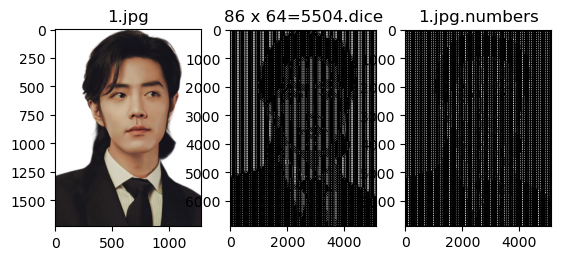

1.jpg Done.
total dices: 94 x 60 = 5686
total dices: 94 x 60 = 5686


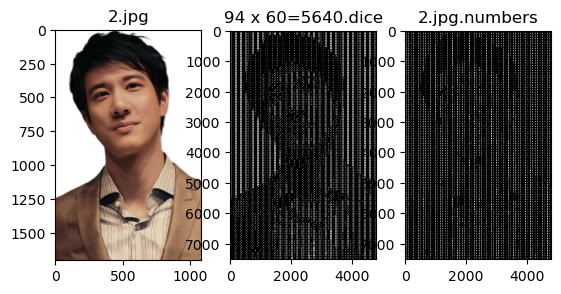

2.jpg Done.
total dices: 104 x 55 = 5799
total dices: 104 x 55 = 5799


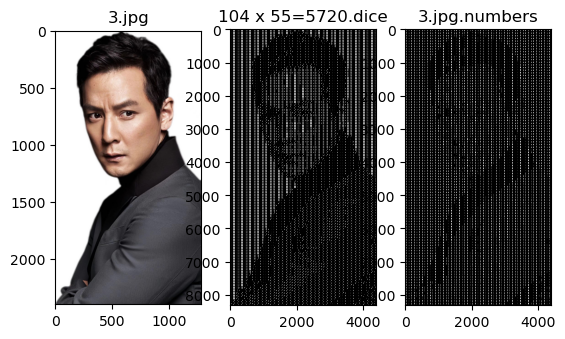

3.jpg Done.
total dices: 109 x 49 = 5407
total dices: 109 x 49 = 5407


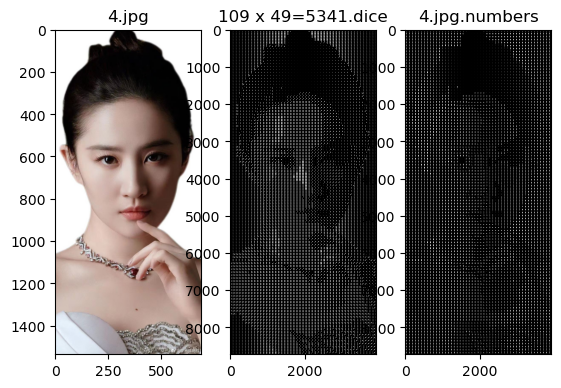

4.jpg Done.


In [16]:
from skimage import io,transform
import math
import os
import numpy as np
from matplotlib import pyplot as plt
from common import rgb2gray, six_step_gray, patch2graydot

#Image和skimage读图片
dice1 = io.imread('./dice/1.jpg')
dice2 = io.imread('./dice/2.jpg')
dice3 = io.imread('./dice/3.jpg')
dice4 = io.imread('./dice/4.jpg')
dice5 = io.imread('./dice/5.jpg')
dice6 = io.imread('./dice/6.jpg')
dice_numbers = [dice1, dice2, dice3, dice4, dice5, dice6]

#Image和skimage读图片
dice1 = io.imread('./dice/11.jpg')
dice2 = io.imread('./dice/22.jpg')
dice3 = io.imread('./dice/33.jpg')
dice4 = io.imread('./dice/44.jpg')
dice5 = io.imread('./dice/55.jpg')
dice6 = io.imread('./dice/66.jpg')

dice_images = [dice1, dice2, dice3, dice4, dice5, dice6]

def image_from_dice(dice_index,dice_set, reversed=True):
    if reversed:
        return dice_set[dice_index - 1]
    return dice_set[6 - dice_index]


def diceit(source, diceset, output="test.png", x_size=20,y_size=20):
    img2 = source
    width  = img2.shape[0]
    height = img2.shape[1]
    print(f"total dices: {int(width/x_size)} x {int(height/y_size)} = {int(width*height/x_size/y_size)}")
    mapped_imgs = []
    for x in range(int(width/x_size)):
        xline_imgs = []
        for y in range(int(height/y_size)):
            cropped = img2[int(x)*x_size:int(x)*x_size+x_size, int(y)*y_size:int(y)*y_size+y_size]
            dice = patch2graydot(cropped, x_size, y_size)
            xline_imgs.append(image_from_dice(dice, diceset))
        merged = np.concatenate(xline_imgs,axis=1)
        mapped_imgs.append(merged)

    dice_image = np.concatenate(mapped_imgs)
    io.imsave(f"{output}.{int(width/x_size)}x{int(height/y_size)}.{int(width*height/x_size/y_size)}.png", dice_image)
    
    return dice_image, (int(width/x_size), int(height/y_size))


def auto_diceit(source_name, max_dice_numbers = 6000):
    source = io.imread(f'./imgs/{source_name}')
    scale = math.ceil(math.sqrt(source.shape[0] * source.shape[1] / max_dice_numbers))
    block_size = scale
    dice_image, dice_size = diceit(source, dice_images,f"output/{source_file}.dice",block_size,block_size)
    number_image, number_size = diceit(source, dice_numbers,f"output/{source_file}.number",block_size,block_size)
    fig, axs = plt.subplots(1, 3)
    
    axs[0].set_title(source_name);
    axs[0].imshow(source);
    
    axs[1].set_title(f"{dice_size[0]} x {dice_size[1]}={dice_size[0] * dice_size[1]}.dice");
    axs[1].imshow(dice_image);
    
    axs[2].set_title(f"{source_name}.numbers");
    axs[2].imshow(number_image)
    plt.show()

for source_file in ["1.jpg", "2.jpg", "3.jpg", "4.jpg"]:
    auto_diceit(source_file)
    print(f"{source_file} Done.")